# Algoritmo de Todd Coxeter

Sea G un grupo definido por una presentación G = < X | R > y H = < Y > un subgrupo suyo. El objetivo será aplicar el Algoritmo de Todd Coxeter para conocer la estructura del grupo y poder realizar operaciones con él.




En primer lugar, importamos las librerías que se usarán:

In [1]:
from ToddCoxeter import *
from IPython.display import display, Image,HTML

- Los generadores serán letras del abecedario \\((a,b,c...)\\) y el elemento inverso de cada generador será representado por la misma letra pero en mayúscula.

- Las relaciones serán palabras en el alfabeto \\( X^{\pm 1}\\) y se deben dar igualadas a 1.


In [2]:
gen = ['a','b']
rels = ['aa','bb','abAB']
genH = []


En primer lugar, creamos una instancia de la clase CosetTable. El algoritmo trabaja
con una tabla que deberá rellenar para enumarar todas las clases laterales de G sobre H.

In [3]:
Group = CosetTable(gen,rels, genH)

Inicialmente, la tabla de clases estará vacía:

In [4]:
Group.tab

[[-1, -1, -1, -1]]

Llamamos a la función principal, encargada de aplicar el método principal y de devolver
la tabla de clases laterales rellena.

In [5]:
Group.CosetEnumeration()

Mostramos la tabla de clases y el grafo de Schreier asociado:

┌───┬───┬───┬───┬───┐
│ C │ a │ A │ b │ B │
├───┼───┼───┼───┼───┤
│ 1 │ 2 │ 2 │ 3 │ 3 │
├───┼───┼───┼───┼───┤
│ 2 │ 1 │ 1 │ 4 │ 4 │
├───┼───┼───┼───┼───┤
│ 3 │ 4 │ 4 │ 1 │ 1 │
├───┼───┼───┼───┼───┤
│ 4 │ 3 │ 3 │ 2 │ 2 │
└───┴───┴───┴───┴───┘
Arrow from 1  to  2  coloured of  red
Arrow from 1  to  3  coloured of  blue
Arrow from 2  to  1  coloured of  red
Arrow from 2  to  4  coloured of  blue
Arrow from 3  to  4  coloured of  red
Arrow from 3  to  1  coloured of  blue
Arrow from 4  to  3  coloured of  red
Arrow from 4  to  2  coloured of  blue


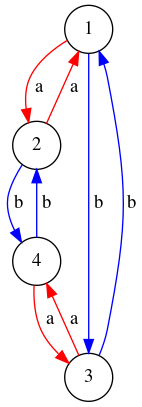

In [21]:
print(Group.table)

Group.schreier_graph()

Uno de los principales problemas del algoritmo es su elevado uso de memoria. 
Por ello, se hace uso de 2 variables:

- M, indica el tope de memoria disponible. (Número máximo de clases permitido)

- n, indica el número de clases utilizadas en el momento actual.

Las clases usadas se pueden ver mediante el método usedCosets(), mientras que
el número de clases finales con finalCosets(). (clases vivas)

In [7]:
u = Group.usedCosets()
f = Group.finalCosets()

print("Clases usadas: {} \n Clases vivas: {}".format(u,f))

Clases usadas: 4 
 Clases vivas: 4


Obtenemos los generadores del grupo y, a partir de ellos, obtenemos el resto de elementos.

In [8]:
generators = Group.getGenerators()


Generators of G:
g0 = (1, 2)(3, 4)
g1 = (1, 3)(2, 4)


In [9]:
G = generate(generators)
print(G)

Group with 4 elements: {(), (1, 2)(3, 4), (1, 4)(2, 3), (1, 3)(2, 4)}


Al darle estructura de grupo, se pueden llamar a todos los métodos de la librería

In [10]:
print(G.Cayley_table())

┌──────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│      *       │      ()      │ (1, 2)(3, 4) │ (1, 4)(2, 3) │ (1, 3)(2, 4) │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│      ()      │      ()      │ (1, 2)(3, 4) │ (1, 4)(2, 3) │ (1, 3)(2, 4) │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ (1, 2)(3, 4) │ (1, 2)(3, 4) │      ()      │ (1, 3)(2, 4) │ (1, 4)(2, 3) │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ (1, 4)(2, 3) │ (1, 4)(2, 3) │ (1, 3)(2, 4) │      ()      │ (1, 2)(3, 4) │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ (1, 3)(2, 4) │ (1, 3)(2, 4) │ (1, 4)(2, 3) │ (1, 2)(3, 4) │      ()      │
└──────────────┴──────────────┴──────────────┴──────────────┴──────────────┘


In [11]:
print(G.elements_order())

{(): 1, (1, 2)(3, 4): 2, (1, 4)(2, 3): 2, (1, 3)(2, 4): 2}


# Otros Ejemplos

In [12]:
file = "Groups/1.txt"

f = readGroup(file)
print(f)

(['a', 'b'], ['aBBAbbb', 'BAAbaaa'], [])


In [13]:
G = CosetTable(f)
G.CosetEnumeration()

┌───┬───┬───┬───┬───┐
│ C │ a │ A │ b │ B │
├───┼───┼───┼───┼───┤
│ 1 │ 1 │ 1 │ 1 │ 1 │
└───┴───┴───┴───┴───┘
Arrow from 1  to  1  coloured of  red
Arrow from 1  to  1  coloured of  blue


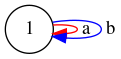

In [14]:
print(G.table)
G.schreier_graph()


In [15]:
G.usedCosets()

85

In [16]:
G.finalCosets()

1

¿Por qué se usan tantas clases en el algoritmo y únicamente 1 de ellas está viva?